In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: 56a1e054e95b
interpreter: 3.8.11 (default, Jul  3 2021, 17:53:42)  [GCC 7.5.0]
notebook name: None
notebook path: None
revision: b646cf90f
timestamp: 2021-07-29T04:10:57Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.3.2
pandas==1.1.2
seaborn==0.11.0
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-4b8e8f9e4d8ca984'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how does fitness change over time?

teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=countplot+x=stint+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=countplot+x=stint+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='count'>

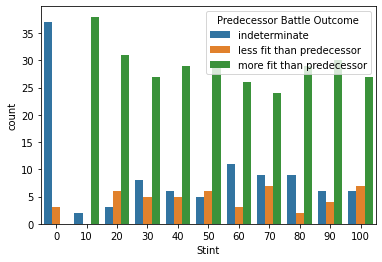

In [8]:
tp.tee(
    sns.countplot,
    data=dfm10,
    x='Stint',
    hue='Predecessor Battle Outcome',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=hline-boxplot+x=stint+y=fitness-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=hline-boxplot+x=stint+y=fitness-complexity-delta+ext=.png


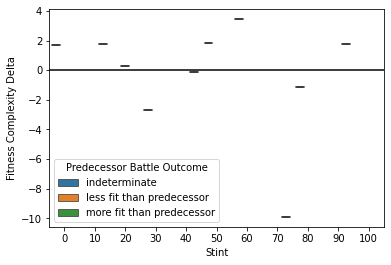

In [9]:
def hline_boxplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    hline_boxplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity Delta',
    hue='Predecessor Battle Outcome',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=barplot+x=stint+y=fitness-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=filter-Stint-mod10+viz=barplot+x=stint+y=fitness-complexity+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

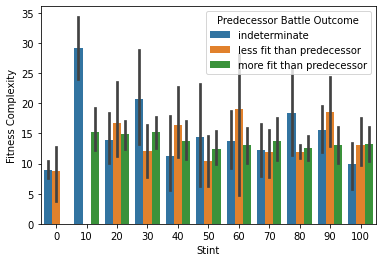

In [10]:
tp.tee(
    sns.barplot,
    data=dfm10,
    x='Stint',
    y='Fitness Complexity',
    hue='Predecessor Battle Outcome',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)